In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set_style('whitegrid')
%matplotlib inline

In [15]:
severity = pd.read_csv('../../data/processed/severity.csv')
#severity.drop('Unnamed', axis = 1)
severity.head()

,Unnamed: 0,ERL,WASH,Health,Nutrition,Shelter/NFI,Protection,Education,Food
0,0,3.0,2.0,0.0,0.0,2,0,2.0,3.0
1,1,2.0,0.0,0.0,0.0,4,0,2.0,6.0
2,2,2.0,0.0,0.0,0.0,4,0,8.0,6.0
3,3,0.0,0.0,0.0,0.0,4,0,2.0,3.0
4,4,0.0,0.0,0.0,0.0,2,0,2.0,8.5


In [17]:
severity.drop('Unnamed: 0', axis = 1, inplace = True)
severity.head()

,ERL,WASH,Health,Nutrition,Shelter/NFI,Protection,Education,Food
0,3.0,2.0,0.0,0.0,2,0,2.0,3.0
1,2.0,0.0,0.0,0.0,4,0,2.0,6.0
2,2.0,0.0,0.0,0.0,4,0,8.0,6.0
3,0.0,0.0,0.0,0.0,4,0,2.0,3.0
4,0.0,0.0,0.0,0.0,2,0,2.0,8.5


##### Extract first n Priorities from Data

In [19]:
#Explore General properties of the severity data
severity.describe()

,ERL,WASH,Health,Nutrition,Shelter/NFI,Protection,Education,Food
count,10378.000000,10378.000000,10378.000000,10378.00000,10378.000000,10378.000000,10378.000000,10378.000000
mean,3.639140,2.472442,2.758335,0.44999,3.331085,1.129505,5.384756,6.069761
std,2.116524,2.168053,2.102965,2.07312,1.834861,1.555003,3.112529,2.176514
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.000000
25%,2.000000,1.000000,2.000000,0.00000,2.000000,0.000000,2.000000,4.160000
50%,4.000000,2.000000,2.000000,0.00000,4.000000,0.000000,4.000000,6.000000
75%,5.000000,4.000000,4.000000,0.00000,4.000000,2.000000,8.000000,7.660000
max,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000


In [27]:
#Find first, second and third priority from the data

temp = pd.Series
temp = severity.idxmax(axis=1)
compare = pd.DataFrame()
#def get_n_best(x,n):
#    return sorted(x)[-n]

compare['Data First Priority']= temp
compare['Data Second Priority'] = severity.T.apply(lambda x: x.nlargest(2).idxmin())

compare['Data Third Priority'] = severity.T.apply(lambda x: x.nlargest(3).idxmin())
compare.head()
compare['Data First Priority'].value_counts()

Food           3960
Education      3435
ERL            1123
Shelter/NFI     483
Nutrition       461
Health          431
WASH            430
Protection       55
Name: Data First Priority, dtype: int64

##### Import Data from the Questionnarie

In [21]:
##### Group Data in PiN
df = pd.read_excel('../../data/raw/reach_nga_msna_clean_dataset_final.xlsx',sheet_name='clean_hh_data') 
# Remove respondents who refuse to take the interview
df = df[df['Consent'] == 'Yes, agrees to interview']

##### Group answers to 'What is your xth priority' in PiN

In [28]:

def group(element):
    if (element == 'Water') or (element == 'Latrines'):
        return 'WASH'
    elif(element == 'Education / Schools'):
        return 'Education'
    elif(element == 'Nutrition'): #Notice that this is in principle wrong. It's just for the purpose of comparison
        return 'Food'    
    elif(element == 'Livelihoods / Income'):
        return 'ERL'
    elif(element == 'Shelter support'):
        return 'Shelter/NFI'    
    elif(element == 'Safety and security'):
        return 'Protection'      
    elif(element == 'Transportation/roads') or (element == 'Legal documentation') or (element == 'Communication') or (element == 'Psychosocial support services'):
        return 'Other'
    elif(element == 'Non-food items (blankets, jerry cans, buckets, etc)') or (element == 'Reunification with family') or (element == 'Energy/Fuel'):
        return 'Other'
    else:
        return element

In [29]:
compare['Answer First Priority'] = df['What is the first priority need for your household overall?'].apply(group)
compare['Answer Second Priority'] = df['What is the second priority need for your household overall?'].apply(group)
compare['Answer Third Priority'] = df['What is the third priority need for your household overall?'].apply(group)

compare['Data First Priority'] = compare['Data First Priority'].apply(group)
compare['Data Second Priority'] = compare['Data Second Priority'].apply(group)
compare['Data Third Priority'] = compare['Data Third Priority'].apply(group)

# Check that the categories are the same 
print(np.unique(list(compare['Answer First Priority'])))
print(np.unique(list(compare['Data First Priority'])))

['ERL' 'Education' 'Food' 'Health' 'No needs' 'Other' 'Protection'
 'Shelter/NFI' 'WASH' 'nan']
['ERL' 'Education' 'Food' 'Health' 'Protection' 'Shelter/NFI' 'WASH']


##### First Priority Comparison

In [30]:
compare['Compare First'] = compare['Answer First Priority'] == compare['Data First Priority']
compare['Compare First'].sum()/len(compare['Compare First'])*100
#Only 29% of the time we are able to correctly understand the main need of the household

29.437271150510696

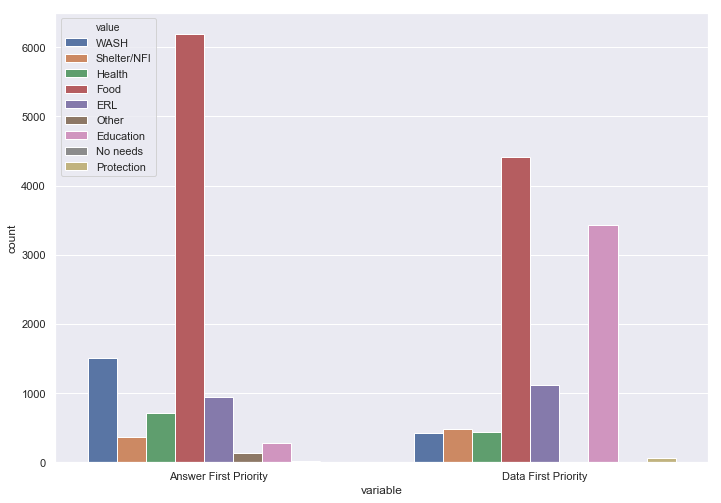

In [31]:
plotdf = compare[['Answer First Priority','Data First Priority']]
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns_plot = sns.countplot(x="variable", hue="value", data=pd.melt(plotdf))
#sns_plot.savefig('Comparison_First.png')
#plt.savefig(sns_plot)
sns_plot.figure.savefig('First_Priority.png', bbox_inches = 'tight',
    pad_inches = 0)

#sns_plot = sns.pairplot(df, hue='species', size=2.5)
#sns_plot.savefig("Firs_Priority.png")

##### Second Priority Comparison

In [32]:
compare['Compare Second'] = compare['Answer Second Priority'] == compare['Data Second Priority']
compare['Compare Second'].sum()/len(compare['Compare Second'])*100
#Only 16% of the time we are able to correctly understand the  Second Priority of the household

16.197725958758912

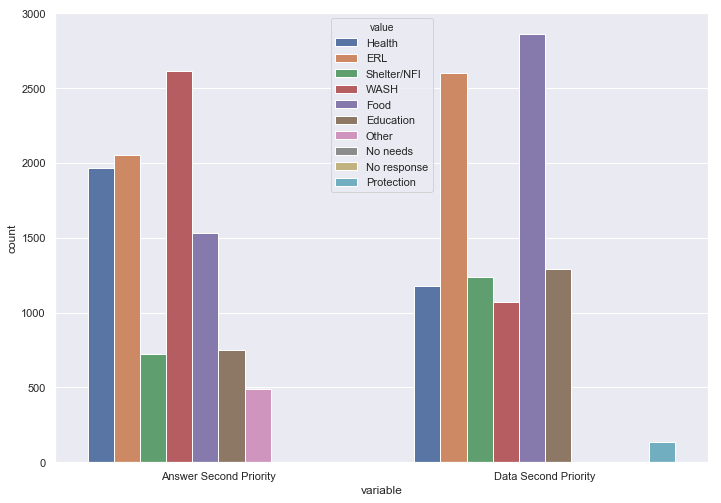

In [33]:
plotdf = compare[['Answer Second Priority','Data Second Priority']]
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x="variable", hue="value", data=pd.melt(plotdf))

##### Third Priority Comparison

In [34]:
compare['Compare Third'] = compare['Answer Third Priority'] == compare['Data Third Priority']
compare['Compare Third'].sum()/len(compare['Compare Third'])*100
#Only 17% of the time we are able to correctly understand the third need of the household

17.363653883214493

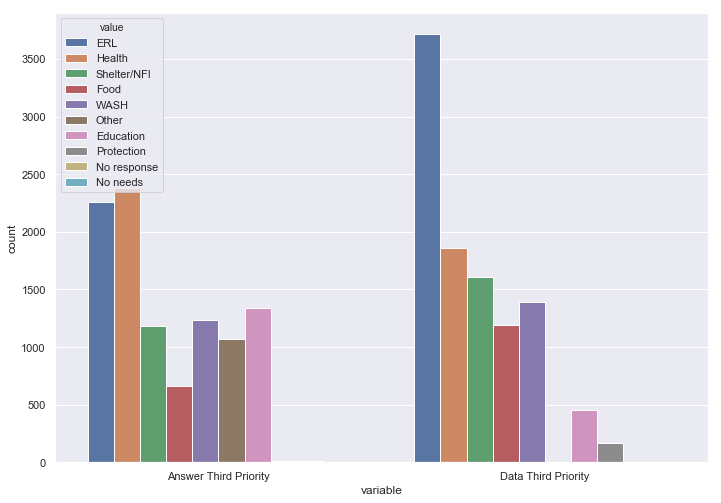

In [35]:
plotdf = compare[['Answer Third Priority','Data Third Priority']]
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x="variable", hue="value", data=pd.melt(plotdf))

### Try different metrics from Classification Problems: Sensitivity is the one that gives more information

In [19]:



# TRUE print((compare == sector)['Answer First Priority'].sum()) 6191
# FALSE print((compare != sector)['Answer First Priority'].sum()) 4187
# POSITIVE print((compare == sector)['Data First Priority'].sum()) 4020
# NEGATIVE print((compare != sector)['Data First Priority'].sum()) 6358
from sklearn.metrics import cohen_kappa_score

def compute_TP(sector):
    TP = 0
    TP = (((compare == sector)['Answer First Priority']*1 + (compare == sector)['Data First Priority']*1) >1).sum()
    return TP
def compute_TN(sector):
    TN = 0
    TN = ((((compare == sector)['Answer First Priority']==False)*1 + ((compare == sector)['Data First Priority']==False)*1) >1).sum()
    return TN
def compute_FP(sector):
    FP = 0
    FP = ((((compare == sector)['Answer First Priority']==False)*1 + (compare == sector)['Data First Priority']*1) >1).sum()
    return FP
def compute_FN(sector):
    FN = 0
    FN = ((((compare == sector)['Answer First Priority']==True)*1 + ((compare == sector)['Data First Priority']==False)*1) >1).sum()
    return FN
def compute_P(sector):
    P = 0
    P = (compare == sector)['Answer First Priority'].sum()
    return P
def compute_N(sector):
    N = 0
    N = (compare != sector)['Answer First Priority'].sum()
    return N
def compute_metric(sector):
    TP = compute_TP(sector)
    TN = compute_TN(sector)
    FP = compute_FP(sector)
    FN = compute_FN(sector)
    P = compute_P(sector)
    N = compute_N(sector)
    Precision = TP/(TP+FP)
    Recall = TP/(TP+FN)
    Sensitivity = TP/(P)
    Specificity = TN/N
    MCC = (TP*TN - FP*FN)/(math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)))                #Matthews correlation coefficient
    CK = cohen_kappa_score((compare == sector)['Answer First Priority']*1, (compare == sector)['Data First Priority']*1)
    F1 = 2*(Precision*Recall)/(Precision+Recall)
    return Precision, Recall, Sensitivity,Specificity,MCC,CK, F1

In [20]:
sectors = ['Food','ERL','WASH','Health','Shelter/NFI','Protection','Education']
l = compute_metric('Food')
print(l)
metric = []
pd.Series(l)
metric = pd.DataFrame(index='Precision Recall Sensitivity Specificity MCC CK F1'.split())
for i in sectors:
    metric[i] = compute_metric(i)
metric
#The metrics which seems to give the highest information is the Sensitivity

(0.6129834878986654, 0.43773219189145535, 0.43773219189145535, 0.5913541915452591, 0.028856758835366255, 0.027223758927386044, 0.5107425555974369)


C:\Users\marco\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars


,Food,ERL,WASH,Health,Shelter/NFI,Protection,Education
Precision,0.612983,0.090828,0.169767,0.081206,0.064182,0.000000,0.030277
Recall,0.437732,0.108395,0.048473,0.049226,0.084699,0.000000,0.367491
Sensitivity,0.437732,0.108395,0.048473,0.049226,0.084699,0.000000,0.367491
Specificity,0.591354,0.891809,0.959761,0.959036,0.954854,0.994699,0.670035
MCC,0.028857,0.000189,0.014552,0.010462,0.034634,-0.001013,0.012988
CK,0.027224,0.000188,0.011706,0.010106,0.034275,-0.000372,0.005852
F1,0.510743,0.098837,0.075413,0.061296,0.073027,NaN,0.055944


### Plot confusion matrix

In [36]:
#Notice that the results used in this confusion matrix are the Sensitivities for each sector

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
    
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          display=False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    if display:
        print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax                         
### Plot confusion matrix

In [37]:
sector_names = list(severity.columns.values)
sector_names.append('Other')
sector_names = np.array(sector_names)

# Build y_test and transform to categorical vector
y_test = compare["Answer First Priority"].values
for i, item in enumerate(y_test):
    if item not in sector_names:
        y_test[i] = 'Other'
for i, c in enumerate(sector_names):
    c_idx = np.where(y_test==c)
    y_test[c_idx] = i  

# Build y_pred and transform to categorical vector
y_pred = compare["Data First Priority"].values
for i, c in enumerate(sector_names):
    c_idx = np.where(y_pred==c)
    y_pred[c_idx] = i

y_test = list(y_test)
y_pred = list(y_pred)

C:\Users\marco\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


In [38]:
y_pred = compare["Data First Priority"].values
for i, c in enumerate(sector_names):
    c_idx = np.where(y_pred==c)
    y_pred[c_idx] = i

y_test = list(y_test)
y_pred = list(y_pred)
len(y_pred)
confusion_matrix(y_test, y_pred)

array([[ 102,   47,   56,   43,    5,  302,  386,    0],
       [ 180,   73,   67,   75,    7,  489,  615,    0],
       [  93,   29,   35,   30,    2,  233,  289,    0],
       [  32,   17,   18,   31,    2,  111,  155,    0],
       [   0,    0,    0,    0,    0,    2,    0,    0],
       [  27,   15,   11,   14,    1,  104,  111,    0],
       [ 641,  233,  224,  273,   35, 2075, 2710,    0],
       [  48,   16,   20,   17,    3,  119,  155,    0]], dtype=int64)

Confusion matrix, without normalization
Normalized confusion matrix


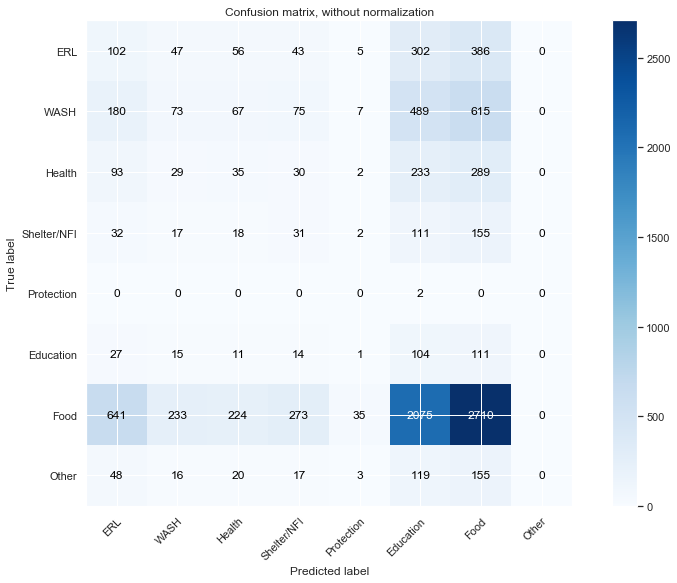

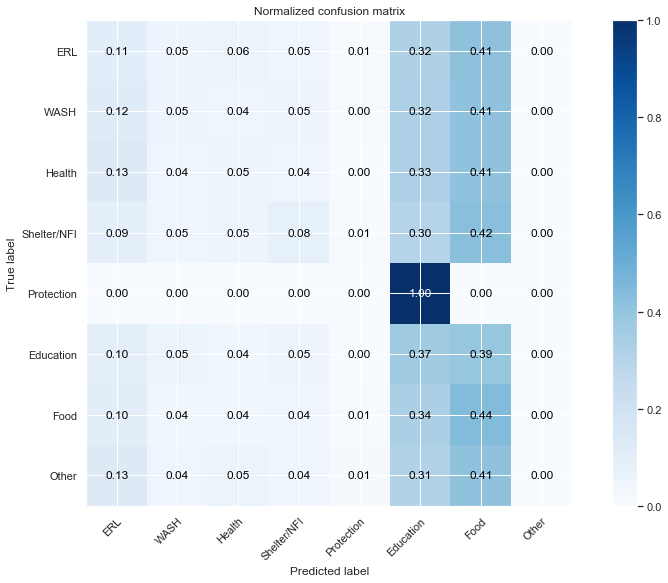

In [39]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=sector_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=sector_names, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig('ConfusionMatrix.png', bbox_inches = 'tight',
    pad_inches = 0)
plt.show()


### Compute Sensitivity and Specificity Including answer to second and third priority

In [26]:
def compute_Sensitivity(sector):
    S1 = 0
    S2 = 0
    S3 = 0
    P = compute_P(sector)
    S1 = compute_TP(sector)/P
    S2 = compute_TP_IncludingSecond(sector)/P
    S3 = compute_TP_IncludingSecondThird(sector)/P
    return S1,S2, S3
def compute_Specificity(sector):
    S1 = 0
    S2 = 0
    S3 = 0
    N = compute_N(sector)
    S1 = compute_TN(sector)/N
    S2 = compute_TNIncludingSecond(sector)/N
    S3 = compute_TNIncludingThird(sector)/N
    return S1,S2, S3
def compute_metricExtended(sector):
    P = 0
    N = 0
    S1 = 0
    S2 = 0
    S3 = 0
    P = compute_P(sector)
    N = compute_N(sector)
    S1 = compute_TP(sector)/P
    S2 = compute_TP_IncludingSecond(sector)/P
    S3 = compute_TP_IncludingSecondThird(sector)/P
    Spec1 = compute_TN(sector)/N
    Spec2 = compute_TNIncludingSecond(sector)/N
    Spec3 = compute_TNIncludingThird(sector)/N
    return S1,Spec1,S2,Spec2,S3,Spec3

In [28]:
sectors = ['Food','ERL','WASH','Health','Shelter/NFI','Protection','Education']
l = compute_metric('Food')
print(l)
metric2 = []
pd.Series(l)
metric2 = pd.DataFrame(index='Sensitivity1 Specificity1 Sensitivity2 Specificity2 Sensitivity3 Specificity3'.split())
for i in sectors:
    metric2[i] = compute_metricExtended(i)
#metric.set_index(['A','B','C','D','E','F'])
metric2
#from numpy.random import randn
#np.random.seed(101)
#randn(5,4)
#df = pd.DataFrame(randn(5,4),index='A B C D E'.split(),columns='W X Y Z'.split()) #DataFrame(data,index,columns)

(0.6129834878986654, 0.43773219189145535, 0.43773219189145535, 0.5913541915452591, 0.028856758835366255, 0.027223758927386044, 0.5107425555974369)


,Food,ERL,WASH,Health,Shelter/NFI,Protection,Education
Sensitivity1,0.437732,0.108395,0.048473,0.049226,0.084699,0.000000,0.367491
Specificity1,0.591354,0.891809,0.959761,0.959036,0.954854,0.994699,0.670035
Sensitivity2,0.683088,0.334750,0.138778,0.164557,0.177596,0.000000,0.462898
Specificity2,0.974684,0.966621,0.983769,0.982621,0.985318,0.998554,0.977316
Sensitivity3,0.777096,0.566419,0.244356,0.308017,0.300546,0.000000,0.512367
Specificity3,0.995223,0.992053,0.995830,0.996379,0.997703,0.999711,1.000000


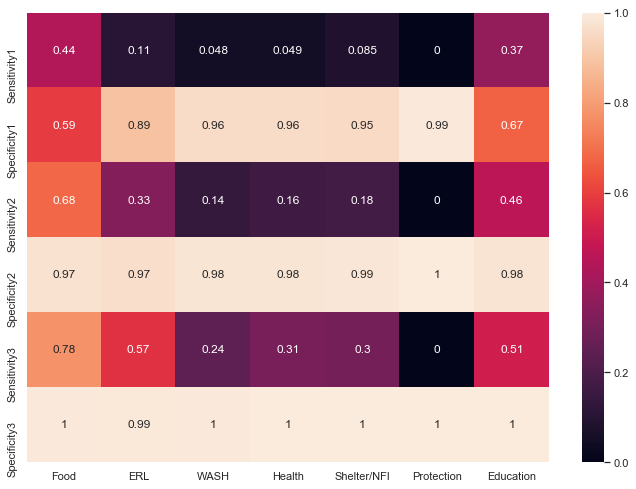

In [35]:
Sensitivity_Specificity = sns.heatmap(data = metric2, annot = True )
Sensitivity_Specificity.figure.savefig('Sensitivity_Specificity.png', bbox_inches = 'tight',
    pad_inches = 0)
